## Import relevant modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr

## Iris dataset

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.drop(columns=['Unnamed: 0'], inplace=True)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Distributions

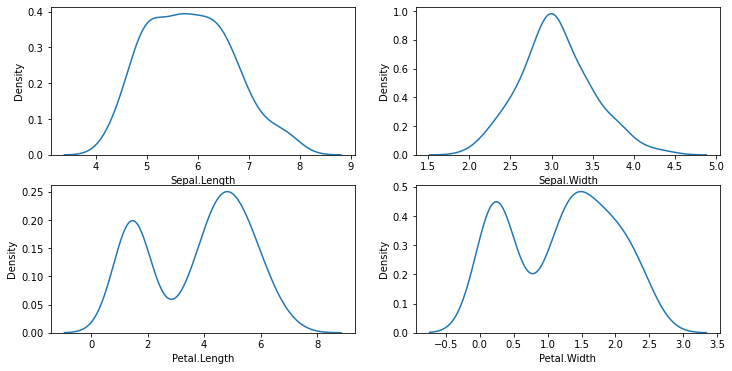

In [3]:
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.kdeplot(iris['Sepal.Length'], ax=ax[0,0])
sns.kdeplot(iris['Sepal.Width'], ax=ax[0,1])
sns.kdeplot(iris['Petal.Length'], ax=ax[1,0])
sns.kdeplot(iris['Petal.Width'], ax=ax[1,1]);

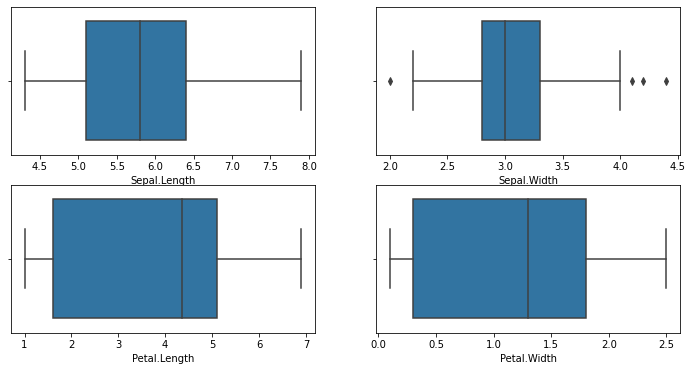

In [4]:
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.boxplot(data=iris, x='Sepal.Length', ax=ax[0,0])
sns.boxplot(data=iris, x='Sepal.Width', ax=ax[0,1])
sns.boxplot(data=iris, x='Petal.Length', ax=ax[1,0])
sns.boxplot(data=iris, x='Petal.Width', ax=ax[1,1]);

### Normal distribution

$$f(\mu | \sigma^2) = {\frac{1}{\sqrt{2 \pi \sigma^2}}e^-{- \frac {(x - \mu)^2}{2 \sigma^2}} }$$

where $\mu$ is the *mean* and $\sigma$ is the *standard deviation* of the data.

Standard normal distribution: $\mu = 0$, $\sigma = 1$

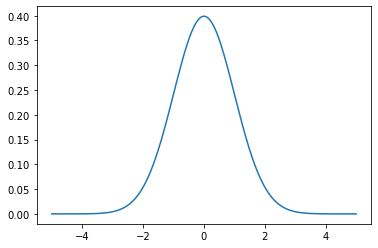

In [5]:
x = np.linspace(-5, 5, 10000)
plt.plot(x, norm.pdf(x));

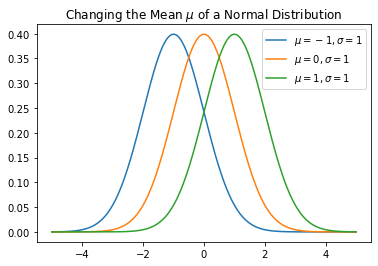

In [6]:
x = np.linspace(-5, 5, 10000)
for mu in (-1, 0, 1):
    plt.plot(x, norm.pdf(x, loc=mu, scale=1), label=f"$\mu={mu}, \sigma=1$")
plt.legend()
plt.title("Changing the Mean $\mu$ of a Normal Distribution");

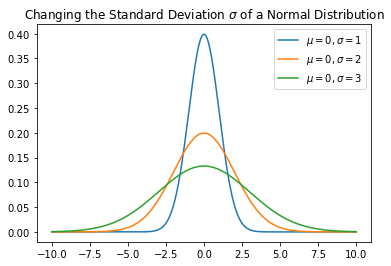

In [7]:
x = np.linspace(-10, 10, 10000)
for sigma in (1, 2, 3):
    plt.plot(x, norm.pdf(x, loc=0, scale=sigma), label=f"$\mu=0, \sigma={sigma}$")
plt.legend()
plt.title("Changing the Standard Deviation $\sigma$ of a Normal Distribution");

Emprical Rule:
For a normally distributed data, the following is true
1. $68\%$ of the data lies within **one** standard deviation of the mean
2. $95\%$ of the data lies within **two** standard deviation of the mean
3. $97.5\%$ of the data lies within **three** standard deviation of the mean

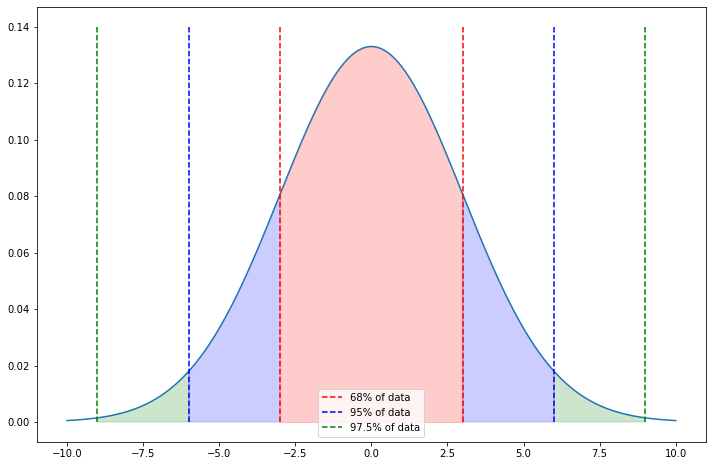

In [8]:
mu = 0
sigma = 3
x = np.linspace(-10, 10, 10000)
y = norm.pdf(x, loc=mu, scale=sigma)

x1= np.array([sigma, sigma])
y1 = [0, 0.14]

plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.plot(x1, y1, 'r--', label="68% of data")
plt.plot([x*-1 for x in x1], y1, 'r--')
plt.fill_between(x, y, where=((x < sigma) & (x > -1*sigma)), color='r', alpha=0.2)
plt.plot([x*2 for x in x1], y1, 'b--', label="95% of data")
plt.plot([x*-2 for x in x1], y1, 'b--')
plt.fill_between(x, y, where=(((x > sigma) & (x < 2*sigma)) | ((x < -1*sigma) & (x > -2*sigma))), \
                 color='b', alpha=0.2)
plt.plot([x*3 for x in x1], y1, 'g--', label="97.5% of data")
plt.plot([x*-3 for x in x1], y1, 'g--')
plt.fill_between(x, y, where=(((x > 2*sigma) & (x < 3*sigma)) | ((x < -2*sigma) & (x > -3*sigma))), \
                 color='g', alpha=0.2)

plt.legend();